In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing housing dataset
california_housing = pd.read_excel('california_housing.xlsx')

In [3]:
california_housing.shape

(20640, 10)

In [4]:
# Reading first five columns of dataset
california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
# Reading last five columns of dataset
california_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [6]:
california_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
california_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [9]:
# Checking for null values
california_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
california_housing.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

### filling null values with mean value of total_bedrooms column

In [11]:
total_bedrooms_mean = california_housing.total_bedrooms.mean()

In [12]:
total_bedrooms_mean

537.8705525375618

In [13]:
california_housing.total_bedrooms.fillna(total_bedrooms_mean,inplace=True)

In [14]:
california_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# Exploring the dataset

In [15]:
california_housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
california_housing.ocean_proximity.value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

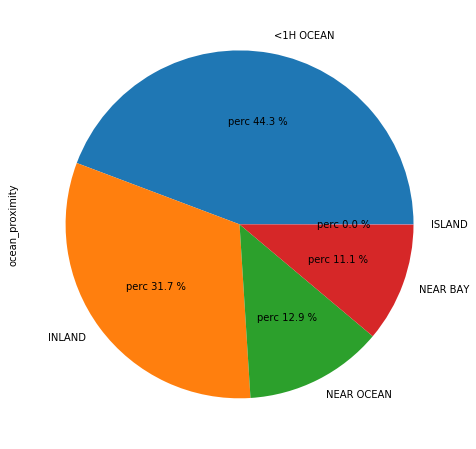

In [17]:
plt.figure(figsize=(10,8))
california_housing.ocean_proximity.value_counts().plot( 
                                                        kind='pie',
                                                        autopct = 'perc %1.1f %%', 
                                                     )

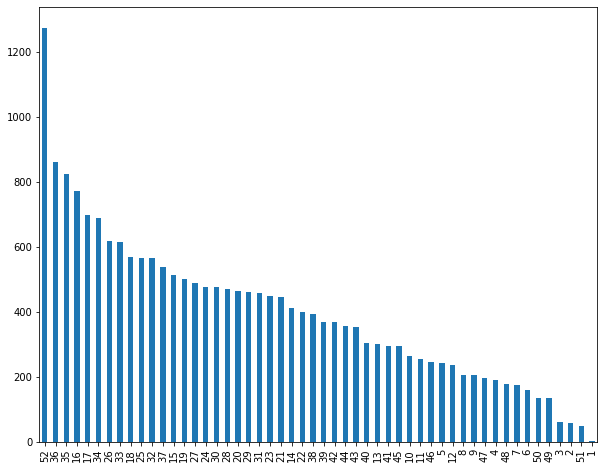

In [18]:
plt.figure(figsize=(10,8))
california_housing.housing_median_age.value_counts().plot(kind='bar')

In [19]:
california_housing.population.nunique()

3888

In [20]:
california_housing.median_house_value.nunique()

3842

### Converting the categorical column to numerical

In [21]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [22]:
california_housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
california_housing['ocean_proximity'].replace('NEAR BAY',1,inplace=True)
california_housing['ocean_proximity'].replace('<1H OCEAN',2,inplace=True)
california_housing['ocean_proximity'].replace('INLAND',3,inplace=True)
california_housing['ocean_proximity'].replace('NEAR OCEAN',4,inplace=True)
california_housing['ocean_proximity'].replace('ISLAND',5,inplace=True)

In [24]:
california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,1,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,1,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,1,342200


In [25]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null int64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [26]:
california_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,0.180381,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.067586,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,-0.204882,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.014818,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.004060,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.008511,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,-0.016911,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,-0.129135,0.688075
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,1.000000,-0.210600
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,-0.210600,1.000000


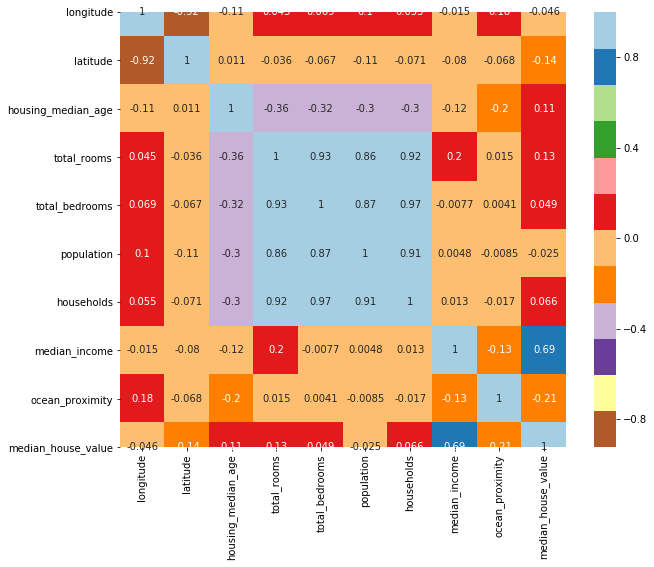

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(california_housing.corr(),annot=True,cmap='Paired_r')

In [28]:
california_housing.ocean_proximity.unique()

array([1, 2, 3, 4, 5], dtype=int64)

### Extracting input (X) and output (Y) data from the dataset.

In [29]:
X = california_housing.iloc[:,0:9]

In [30]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,1


In [31]:
X.shape

(20640, 9)

In [32]:
Y = california_housing.iloc[:,[-1]]

In [33]:
Y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [34]:
Y.shape

(20640, 1)

## Splitting the data into 80% training dataset and 20% test dataset.

In [35]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [36]:
X_train.shape,Y_train.shape

((16512, 9), (16512, 1))

In [37]:
X_test.shape,Y_test.shape

((4128, 9), (4128, 1))

## standardizing the data

In [38]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler()
X_train_standardized = standard_data.fit_transform(X_train)
X_test_standardized = standard_data.fit_transform(X_test)

In [39]:
print('mean values before standardized:',np.sum(X_train.mean()),np.sum(X_test.mean()))

mean values before standardized: 5048.786190695167 5053.290744456572


In [40]:
print('mean values after standardized:',np.sum(X_train_standardized.mean()),np.sum(X_test_standardized.mean()))

mean values after standardized: -3.769116323479806e-16 -3.767681926807163e-17


# performing LinearRegression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
LR = LinearRegression()

In [43]:
LR.fit(X_train_standardized,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
Y_predict = LR.predict(X_test_standardized)

### Printing root mean squared error (RMSE) from Linear Regression.

In [45]:
print('mean squared error:',mean_squared_error(Y_test,Y_predict))

mean squared error: 4963539580.462038


# PerformingDecision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
DR = DecisionTreeRegressor()
DR.fit(X_train_standardized,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [47]:
Y_predict_dtree = DR.predict(X_test_standardized)

### Printing RMSE (root mean squared error) from Random Forest Regression.

In [48]:
print('mean squared error:',mean_squared_error(Y_test,Y_predict_dtree))

mean squared error: 5400352374.848595


# Performing Random Forest Regression on training data.

In [49]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train_standardized,Y_train)

C:\Users\PRITHVIRAJ REDDY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PRITHVIRAJ REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
Y_predict_rfr = RFR.predict(X_test_standardized)

### Printing RMSE (root mean squared error) from Random Forest Regression

In [51]:
print('mean squared error:',mean_squared_error(Y_test,Y_predict_rfr))

mean squared error: 3149893321.2265625


# Performing Linear Regression with one independent variable

In [52]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null int64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [53]:
x = california_housing.iloc[:,[-3]]

In [54]:
x.head()

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [55]:
x.shape

(20640, 1)

In [56]:
y = california_housing.iloc[:,[-1]]

In [57]:
y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [58]:
y.shape

(20640, 1)

### splitting the data into traning and testing from one dependent variable

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=4)

In [60]:
x_train.shape,y_train.shape

((16512, 1), (16512, 1))

In [61]:
x_test.shape,y_test.shape

((4128, 1), (4128, 1))

In [62]:
from sklearn.linear_model import LinearRegression
lr_one_independent = LinearRegression()
lr_one_independent.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_prediction =  lr_one_independent.predict(x_test)

### printing mean square error

In [64]:
print('mean squared error:',mean_squared_error(Y_test,y_prediction))

mean squared error: 6853089586.157506


# Performing Linear Regression with one independent variable (standardized)

In [65]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler()
x_train_standardized = standard_data.fit_transform(x_train)
x_test_standardized = standard_data.fit_transform(x_test)

In [66]:
print('mean values before standardized:',np.sum(x_train.mean()),np.sum(x_test.mean()))

mean values before standardized: 3.874182521802328 3.856624927325583


In [67]:
print('mean values after standardized:',np.sum(x_train_standardized.mean()),np.sum(x_test_standardized.mean()))

mean values after standardized: 8.068481283613057e-18 -1.7212760071707854e-16


In [68]:
lr_stand = LinearRegression()
lr_stand.fit(x_train_standardized,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_predict_stand = lr_stand.predict(x_test_standardized)

In [70]:
print('mean squared error:',mean_squared_error(Y_test,y_predict_stand))

mean squared error: 6854650969.910264


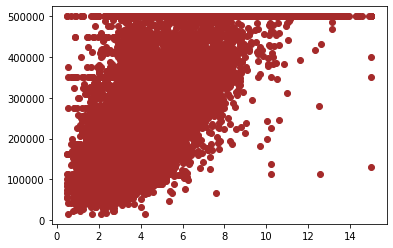

In [71]:
plt.scatter(x, y, color='brown')

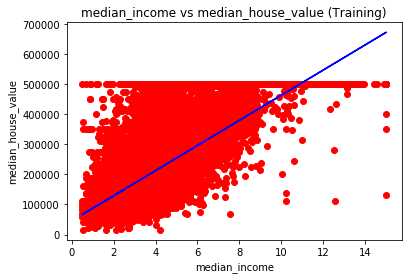

In [72]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr_one_independent.predict(x_train), color = 'blue')
plt.title('median_income vs median_house_value (Training)')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

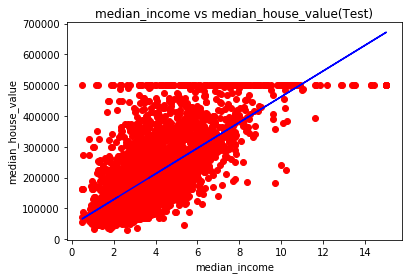

In [73]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_prediction, color = 'blue')
plt.title('median_income vs median_house_value(Test)')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()